In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import squarify 
import re
import seaborn as sns
from collections import Counter

In [31]:
df = pd.read_csv("survey_results_public_2023.csv")
schema_df=pd.read_csv("survey_results_schema.csv")

In [32]:
pd.set_option("display.max_columns",85)
pd.set_option("display.max_rows",85)

In [33]:
#gives the rows and columns
df.shape

(89184, 84)

In [34]:
#o/p all the column names
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [35]:
# give the no of rows, columns and datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [36]:
df.head(5)
#df.tail(10)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [37]:
#two ways to access a particular column

# 1. 
df["Age"]

# 2. 
#df.Age

0           18-24 years old
1           25-34 years old
2           45-54 years old
3           25-34 years old
4           25-34 years old
                ...        
89179       25-34 years old
89180       18-24 years old
89181     Prefer not to say
89182    Under 18 years old
89183       35-44 years old
Name: Age, Length: 89184, dtype: object

In [38]:
type(df["Country"])

pandas.core.series.Series

In [39]:
df["Country"].value_counts()  # to check the occurrence of a particular values in a variable

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: count, Length: 185, dtype: int64

In [40]:
# accessing multiple colums
df[["Age","Employment"]].head()

,Age,Employment
0,18-24 years old,NaN
1,25-34 years old,"Employed, full-time"
2,45-54 years old,"Employed, full-time"
3,25-34 years old,"Employed, full-time"
4,25-34 years old,"Employed, full-time;Independent contractor, fr..."


In pandas, both loc and iloc are used for indexing and selecting data, but they have different ways of doing so:

loc: This is primarily label-based indexing. It selects data based on the labels of the rows and columns. When you use loc, you specify the row and column labels explicitly. The syntax is df.loc[row_label, column_label].

iloc: This is primarily integer-based indexing. It selects data based on the integer indices of the rows and columns, similar to how you would index arrays in Python. When you use iloc, you specify the row and column indices explicitly. The syntax is df.iloc[row_index, column_index].

In [41]:
df.loc[0:4, "Age":"EdLevel"]

,Age,Employment,RemoteWork,CodingActivities,EdLevel
0,18-24 years old,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


In [42]:
df.iloc[2:5, 1:10]

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline
2,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...
3,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...
4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...


In [43]:
schema_df.set_index("qname",inplace=True) # here the index is being set as qname
schema_df.sort_index(inplace=True)         # sorting the index alphabetically
schema_df.loc[:,["question"]]   
    

,question
qname,
AIAcc,For the AI tools you use as part of your devel...
AIBen,How much do you trust the accuracy of the outp...
AIDev,Which <b>AI-powered developer tools</b> did yo...
AINext,Thinking about how your workflow and process c...
AIOpen,Please describe how you would expect your work...
AISearch,Which <b>AI-powered search tools</b> did you u...
AISelect,Do you currently use AI tools in your developm...
AISent,How favorable is your stance on using AI tools...
AITool,Which parts of your development workflow are y...


In [44]:
#Filter based on column
filt=(df["WorkExp"]>=1)
df.loc[filt, ["Employment","WorkExp","YearsCode"]]

,Employment,WorkExp,YearsCode
1,"Employed, full-time",10.0,18
2,"Employed, full-time",23.0,27
3,"Employed, full-time",7.0,12
4,"Employed, full-time;Independent contractor, fr...",6.0,6
5,"Employed, full-time",22.0,21
...,...,...,...
89174,"Employed, full-time",2.0,5
89175,"Employed, full-time",8.0,10
89177,"Employed, full-time",12.0,17
89178,"Employed, full-time",22.0,25


In [45]:
# filtering based on list of values
countries=["United States of America","Canada","India"]
filt_country=df["Country"].isin(countries)
df.loc[filt_country]

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Heli

In [46]:
# filtering using string
filt_lang=df["LanguageHaveWorkedWith"].str.contains("Rust",na=False)
df.loc[filt_lang,"LanguageHaveWorkedWith"]

7        Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript
13                                       C;C++;Python;Rust
26       Bash/Shell (all shells);C#;Go;JavaScript;PHP;R...
35       Bash/Shell (all shells);C;HTML/CSS;Java;JavaSc...
37       Bash/Shell (all shells);Java;JavaScript;PowerS...
                               ...                        
89123    Bash/Shell (all shells);C++;HTML/CSS;JavaScrip...
89127                            Elixir;Erlang;Python;Rust
89134    Bash/Shell (all shells);C;C++;Elixir;Go;Haskel...
89168    Assembly;Bash/Shell (all shells);C;C++;HTML/CS...
89181    Assembly;Bash/Shell (all shells);C;C#;Python;R...
Name: LanguageHaveWorkedWith, Length: 11427, dtype: object

In [47]:
# making changes to the column name
# 1. df.columns=["Q1111","YipYip"] # thisss wont work bcoz there is a length mismatch

# 2. df.columns = df.columns.str.replace(' ','_')

# 3.
#df.columns=[x.upper() for x in df.columns]
#df

# 4. #inplace="True"
#df.rename(columns={"AGE":"PERSONAGE","Q120":"AGREE/DISAGREE"})


In [48]:
# making changes to rows

# 1. this is changing each value of the row 2nd so basically 83 values needs to be entered manually
#df.loc[2]=["","",""]

# 2. changing some values
#df.loc[2,["Age","EdLevel"]]=["18-24 years old","Nan"]
#df.loc[2]

In [49]:
df["Currency"]=df["Currency"].str.lower()
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,usd\tunited states dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back

In [50]:
#to use when nan is there
def update_rw(RemoteWork):
    if isinstance(RemoteWork, str):
        return RemoteWork.upper()
    else:
        return RemoteWork

df["RemoteWork"].apply(update_rw)


0                                         NaN
1                                      REMOTE
2        HYBRID (SOME REMOTE, SOME IN-PERSON)
3        HYBRID (SOME REMOTE, SOME IN-PERSON)
4                                      REMOTE
                         ...                 
89179                                  REMOTE
89180    HYBRID (SOME REMOTE, SOME IN-PERSON)
89181                                     NaN
89182    HYBRID (SOME REMOTE, SOME IN-PERSON)
89183    HYBRID (SOME REMOTE, SOME IN-PERSON)
Name: RemoteWork, Length: 89184, dtype: object

In [51]:
#df['Age'].apply(len)                         # dont work when nan is there
df['RemoteWork'].astype(str).apply(len)       # to use when nan is there                

0         3
1         6
2        36
3        36
4         6
         ..
89179     6
89180    36
89181     3
89182    36
89183    36
Name: RemoteWork, Length: 89184, dtype: int64

In [52]:
#df.apply(pd.Series.min)
#df.applymap(len)
df["RemoteWork"].replace({"Remote":"NA"}) # doesnt work on NaN

0                                         NaN
1                                          NA
2        Hybrid (some remote, some in-person)
3        Hybrid (some remote, some in-person)
4                                          NA
                         ...                 
89179                                      NA
89180    Hybrid (some remote, some in-person)
89181                                     NaN
89182    Hybrid (some remote, some in-person)
89183    Hybrid (some remote, some in-person)
Name: RemoteWork, Length: 89184, dtype: object

In [53]:
#combine columns
#df["combined_column"]=df["Age"]+" "+df["Q120"]

In [54]:
# suppose we have a single column(full_name Shrushti Agarwal) with (firstname lastname) and want to split into 2
#df[['firstname','lastname']]=df['full_name'].str.split(' ',expand=True)

In [55]:
# add rows to data
df._append({"Age":"18-24 years old"},ignore_index=True)  #other columns will be nan

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1.0,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,usd\tunited states dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3.0,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer

In [56]:
# append dataframe to another
#df._append(df2,ignore_index=True)

In [57]:
#removing rows
filt=df["Age"]=="18-24 years old"
df.drop(index=df[filt].index)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,usd\tunited states dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,usd\tunited states dollar,2.500000e+05,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Em

In [58]:
df.sort_values(by=['Age','YearsCode'],ascending=[True,False]).head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
8116,8117,I agree,I am learning to code,18-24 years old,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Profe...,Primary/elementary school,Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other;Codecademy;edX;Udemy;Pluralsight;Courser...,More than 50 years,NaN,"Developer, desktop or enterprise applications",NaN,NaN,Given a list,Start a free trial;Ask developers I know/work ...,Philippines,NaN,NaN,Ada;Apex;APL;Assembly;Bash/Shell (all shells);...,Ada;Apex;APL;Assembly;Bash/Shell (all shells);...,BigQuery;Cassandra;Clickhouse;Cloud Firestore;...,BigQuery;Cassandra;Clickhouse;Cloud Firestore;...,Amazon Web Services (AWS);Cloudflare;Colocatio...,Amazon Web Services (AWS);Cloudflare;Colocatio...,Angular;AngularJS;ASP.NET;ASP.NET CORE;Blazor;...,Angular;AngularJS;ASP.NET;ASP.NET CORE;Blazor;...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAU...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAU...,Ansible;Ant;APT;bandit;Boost.Test;build2;Bun;C...,Ansible;Ant;APT;bandit;Boost.Test;build2;Bun;C...,Android Studio;Atom;BBEdit;CLion;Code::Blocks;...,Android Studio;Atom;BBEdit;CLion;Code::Blocks;...,AIX;Android;Arch;BSD;ChromeOS;Cygwin;Debian;Fe...,AIX;Android;Arch;BSD;ChromeOS;Cygwin;Debian;Fe...,Adobe Workfront;Airtable;Asana;Azure Devops;Ba...,Adobe Workfront;Airtable;Asana;Azure Devops;Ba...,Cisco Webex Teams;Coolfire Core;Discord;Google...,Cisco Webex Teams;Coolfire Core;Discord;Google...,Andi;Bing AI;ChatGPT;Google Bard AI;Metaphor;N...,Andi;Bing AI;ChatGPT;Google Bard AI;Metaphor;N...,Adrenaline;AWS CodeWhisperer;GitHub Copilot;Mi...,Adrenaline;AWS CodeWhisperer;GitHub Copilot;Mi...,Stack Overflow;Stack Exchange;Stack Overflow f...,A few times per week,Yes,Less than once per month or monthly,Neutral,IT resources,Yes,Very favorable,Other (please explain);Increase productivity;G...,Neither trust nor distrust,Learning about a codebase;Project planning;Wri...,Learning about a codebase;Project planning;Wri...,Learning about a codebase;Project planning;Wri...,Learning about a codebase;Project planning;Wri...,Learning about a codebase;Project planning;Wri...,NaN,Learning about a codebase;Project planning;Wri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN
8721,8722,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Boots...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Other (please specify):,NaN,NaN,More than 5

In [59]:
#df.nlargest(10,"column_name")  #top n highest column_name
#df.nsmallest(10,"column_name")  #top n smallest column_name

In [60]:
filt=df["Currency"]=="usd\tunited states dollar"
df.loc[filt,"CompTotal"].median()

140000.0

In [61]:
df["ConvertedCompYearly"].median()

74963.0

In [62]:
#df.describe()     #use for numeric data 

In [63]:
df["Age"].value_counts(normalize=True)   #pass normalize=True for %value

Age
25-34 years old       0.372791
35-44 years old       0.230221
18-24 years old       0.201056
45-54 years old       0.093447
Under 18 years old    0.046286
55-64 years old       0.038034
65 years or older     0.013130
Prefer not to say     0.005035
Name: proportion, dtype: float64

In [64]:
grpCountry=df.groupby(["Country"])
grpCountry

In [65]:
grpCountry["Age"].value_counts().loc["India"]

Age
18-24 years old       2296
25-34 years old       2289
35-44 years old        512
Under 18 years old     378
45-54 years old        107
55-64 years old         20
Prefer not to say       19
65 years or older        4
Name: count, dtype: int64

In [66]:
grpCountry["ConvertedCompYearly"].median().sort_values(ascending=False)

Country
United States of America    150000.0
Dominica                    132857.0
Switzerland                 122064.5
Israel                      112257.0
Djibouti                    110516.5
                              ...   
Marshall Islands                 NaN
North Korea                      NaN
Samoa                            NaN
San Marino                       NaN
Timor-Leste                      NaN
Name: ConvertedCompYearly, Length: 185, dtype: float64

In [67]:
grpCountry["ConvertedCompYearly"].agg(["median","mean"])

,median,mean
Country,,
Afghanistan,915.0,843636.090909
Albania,10741.0,29219.450000
Algeria,8782.0,10069.190476
Andorra,42836.0,120368.800000
Angola,4302.0,4302.000000
...,...,...
"Venezuela, Bolivarian Republic of...",12000.0,23068.851852
Viet Nam,12763.0,20995.956140
Yemen,6500.0,15089.333333


In [68]:
filt=df["LanguageHaveWorkedWith"].str.contains("Python",na=False)
df.loc[filt,["LanguageHaveWorkedWith","Country"]]["Country"]=="India"


1        False
7        False
9         True
10       False
11       False
         ...  
89172    False
89176    False
89180    False
89181    False
89182    False
Name: Country, Length: 43158, dtype: bool

In [69]:
#grpCountry["LanguageHaveWorkedWith"].str.contains("Python",na=False)

In [70]:
python_user=grpCountry["LanguageHaveWorkedWith"].apply(lambda x: x.str.contains("Python").sum())  # lambda x: x.str.contains("Python") gives boolean values so true is 1 false is 0
python_user

Country
Afghanistan                              22
Albania                                  19
Algeria                                  35
Andorra                                   5
Angola                                    4
                                       ... 
Venezuela, Bolivarian Republic of...     42
Viet Nam                                174
Yemen                                     8
Zambia                                   11
Zimbabwe                                 19
Name: LanguageHaveWorkedWith, Length: 185, dtype: int64

In [71]:
total_user=df["Country"].value_counts()
total_user

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: count, Length: 185, dtype: int64

In [72]:
dff=pd.concat([python_user,total_user],axis="columns")
dff

,LanguageHaveWorkedWith,count
Country,,
Afghanistan,22,64
Albania,19,60
Algeria,35,85
Andorra,5,16
Angola,4,13
...,...,...
"Venezuela, Bolivarian Republic of...",42,106
Viet Nam,174,390
Yemen,8,20


In [73]:
schema_df.loc["LearnCodeOnline","question"]

'What online resources do you use to learn to code? Select all that apply.'

In [74]:
df.drop(columns=[ 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4',
       'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8',
       'Frequency_1', 'Frequency_2', 'Frequency_3','Currency', 'CompTotal',
       'PurchaseInfluence','SOComm','TBranch','ICorPM','SurveyLength',
       'SurveyEase','NEWSOSites','SOAccount','AIToolNot interested in Using',
       'AINextVery different', 'AINextNeither different nor similar',
       'AINextSomewhat similar', 'AINextVery similar',
       'AINextSomewhat different','Q120' ],inplace=True)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,TechList,BuyNewTool,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,SOVisitFreq,SOPartFreq,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Daily or almost daily,A few times per month or weekly,"I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,10.0,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",Given a list,Start a free trial;Ask developers I know/work ...,United States of America,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,Markdown File;Stack Overflow for Teams,Markdown File,Microsoft Teams;Slack;Zoom,Slack;Zoom,NaN,NaN,NaN,NaN,A few times per month or weekly,Less than once per month or monthly,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,23.0,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (so

In [75]:
# types of missing values: np.nan, None, custom ones(NA,Missing)

#df.dropna() here axis='index',how='any'
#axis can be set to index or cloumns
# how can be set to all(if entirely missing then only drop) or any(if any missing value drop entirely)

#df.dropna(axis='index', subset=["Age","Employment"])

#for custom values
#df.replace("NA",np.nan,inplace="True")
#df.replace("Missing",np.nan,inplace="True")

#df.fillna() usally used with numeric data eg: if grades missing then 0

In [76]:
'''df["WorkExp"]=df["WorkExp"].fillna(999)
df["ConvertedCompYearly"]=df["ConvertedCompYearly"].fillna(999)
df["YearsCode"]=df["YearsCode"].fillna(999)	
df["YearsCodePro"]=df["YearsCodePro"].fillna(999)'''

'df["WorkExp"]=df["WorkExp"].fillna(999)\ndf["ConvertedCompYearly"]=df["ConvertedCompYearly"].fillna(999)\ndf["YearsCode"]=df["YearsCode"].fillna(999)\t\ndf["YearsCodePro"]=df["YearsCodePro"].fillna(999)'

In [77]:
#df["WorkExp"].value_counts()

In [78]:
df["YearsCodePro"].replace("Less than 1 year","1",inplace=True)
df["YearsCodePro"].replace("More than 50 years","50",inplace=True)
df["YearsCodePro"].value_counts()

C:\Users\shrus\AppData\Local\Temp\ipykernel_15756\4270552657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCodePro"].replace("Less than 1 year","1",inplace=True)
C:\Users\shrus\AppData\Local\Temp\ipykernel_15756\4270552657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

YearsCodePro
5     4792
10    4594
2     4464
1     4432
3     4378
4     3970
6     3637
7     3509
8     3462
15    2789
12    2398
20    2227
9     2145
11    2013
13    1690
25    1449
16    1278
14    1256
18    1212
17    1146
23    1112
30     924
22     845
24     686
19     649
21     565
27     490
26     486
35     462
28     417
40     329
32     293
33     264
29     217
36     200
31     187
34     177
38     164
37     150
50     107
45     102
39      99
42      81
41      79
43      67
44      42
46      33
48      30
47      24
49      14
Name: count, dtype: int64

In [79]:
df["YearsCode"].unique()
df["YearsCode"].replace("Less than 1 year","1",inplace=True)
df["YearsCode"].replace("More than 50 years","50",inplace=True)
df["YearsCode"].value_counts()

C:\Users\shrus\AppData\Local\Temp\ipykernel_15756\1828213532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCode"].replace("Less than 1 year","1",inplace=True)
C:\Users\shrus\AppData\Local\Temp\ipykernel_15756\1828213532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

YearsCode
10    6521
5     5415
6     4893
8     4879
7     4800
4     4466
15    4336
3     4269
20    4021
12    3471
9     3130
2     2826
25    2685
13    2601
11    2519
14    2278
1     2262
30    2078
16    1842
18    1690
17    1544
23    1327
40    1302
22    1210
35    1118
24     959
19     826
21     761
28     715
27     710
26     706
33     496
50     478
32     444
38     428
45     360
42     347
34     333
29     324
37     312
36     282
31     272
43     265
39     229
41     227
44     160
46     101
48      96
47      79
49      42
Name: count, dtype: int64

In [80]:
#df["YearsCode"].dtype 
# was object 1st then was concerted to int64 when there was replacement done. same with YearsCodePro

In [81]:
df["YearsCode"]=df["YearsCode"].astype("float64")
df["YearsCodePro"]=df["YearsCodePro"].astype("float64") 

### Top Languages, Databases, Platforms, etc in 2023

In [82]:
def plot_top_technologies(df, column_name, top_n=15, title_suffix='', color=''):
    # Check if the specified column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Error: {column_name} does not exist in the DataFrame.")
        return
    
    # Drop any NaN values from the specified column
    responses = df[column_name].dropna()
    
    # Initialize a Counter to count occurrences of each technology
    counter = Counter()
    
    # Update the counter with technologies from each response
    for response in responses:
        counter.update(response.split(';'))
    
    # Get the top 'top_n' most common technologies and their counts
    items, counts = zip(*counter.most_common(top_n))
    
    # Reverse the lists to display the most common technologies at the top
    items = items[::-1]
    counts = counts[::-1]
    
    # Create a figure for the plot with specified dimensions
    plt.figure(figsize=(7, 5))
    
    # Create a horizontal bar plot
    bars = plt.barh(items, counts, color={color})
    
    # Add gridlines on the x-axis
    plt.grid(axis='x', linestyle='--', alpha=0.7, color="gray")
    
    # Remove the top, right, bottom, and left spines (borders) of the plot
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    # Set the title of the plot with customization
    plt.title(f"Most Popular {title_suffix}", color="black", fontweight='bold', fontsize=20, loc='center', y=1.04 )
    
    # Set the subtitle of the plot
    plt.suptitle(f'Top 15 {title_suffix} in 2023', fontsize=8, color='gray', y=0.857)
    
    # Set the x-axis label
    plt.xlabel("Number of People Who Use", fontsize=10, color="gray")
    
    # Set the y-axis label
    plt.ylabel(f"{title_suffix} Technologies", fontsize=10, color="gray")
    
    # Customize the x and y ticks
    plt.xticks(fontsize=9, color="#a97499")
    plt.yticks(fontsize=9, color="#a97499")
    
    # Add text labels on the bars to show their values
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}',
                 va='center', ha='left', fontsize=10, color='#ffa600')
    
    # Adjust the layout to make sure everything fits without overlap
    plt.tight_layout()
    
    # Display the plot
    plt.show()

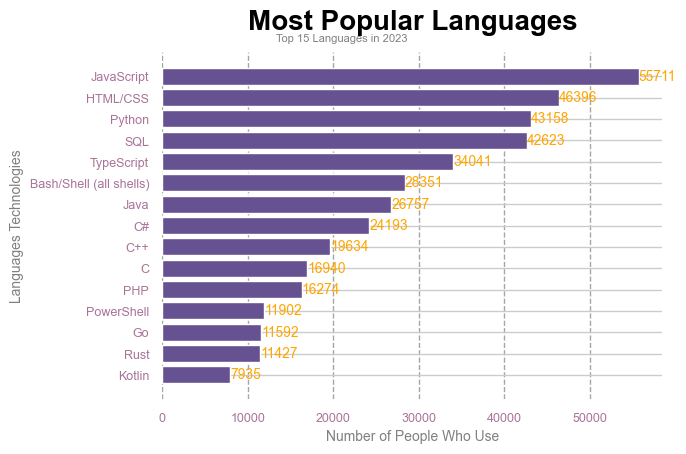

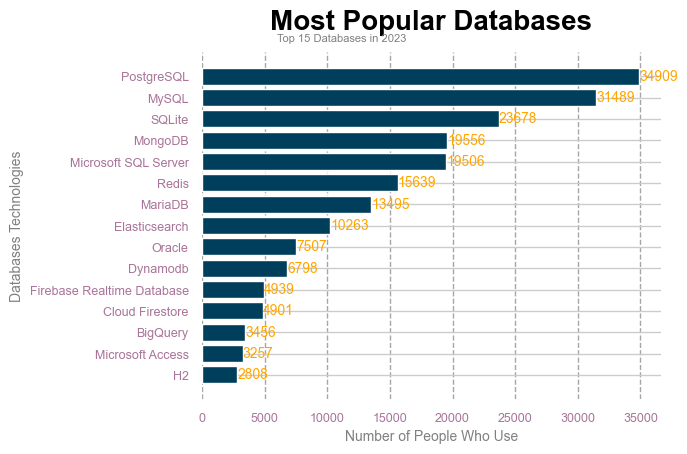

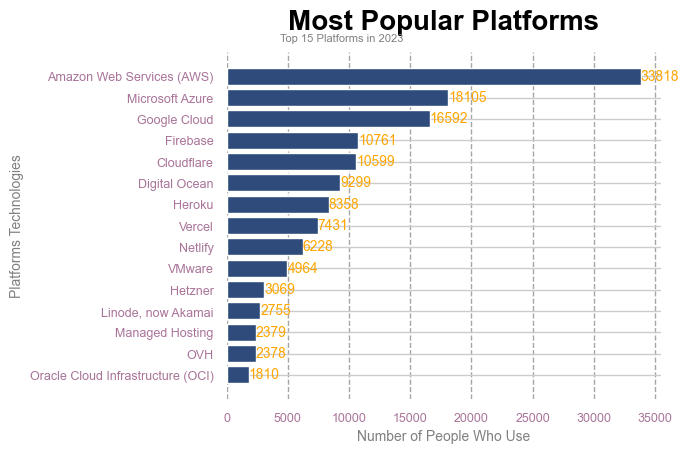

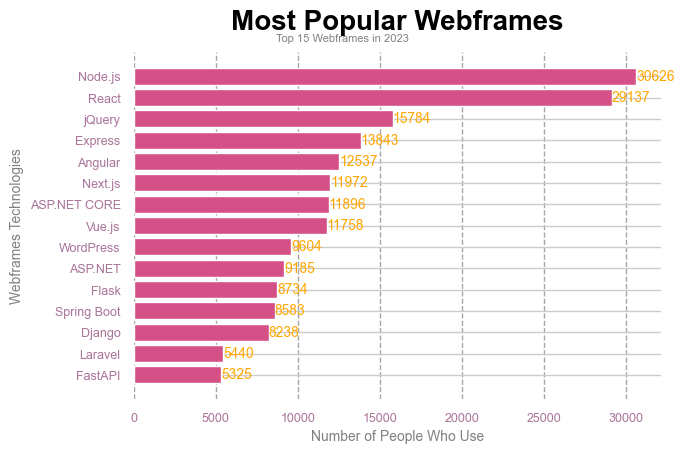

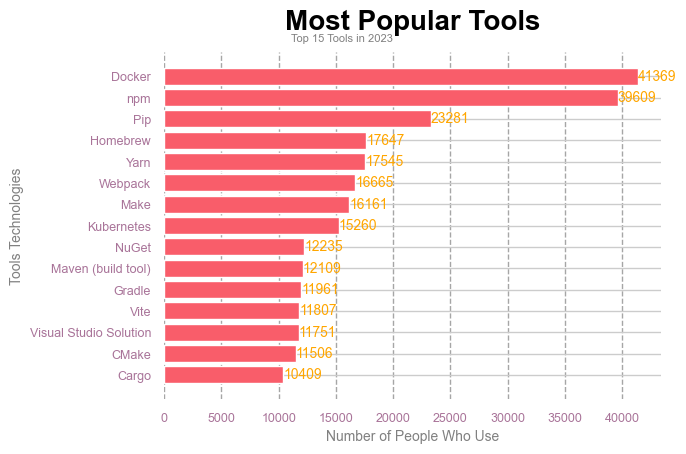

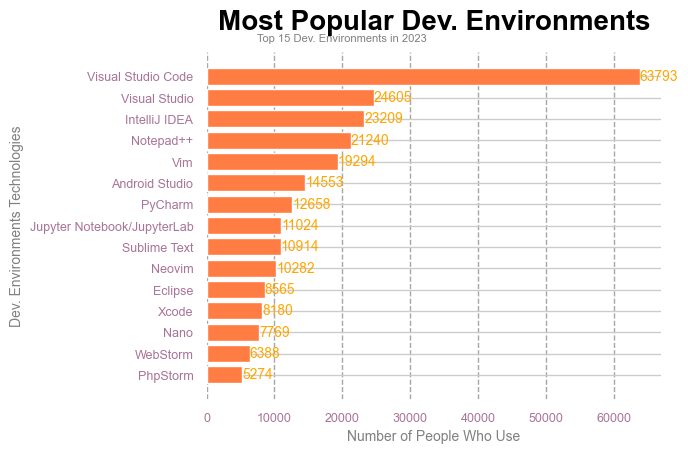

In [83]:
# Define custom colors for each plot
custom_colors = ["#665191", "#003f5c", "#2f4b7c", "#d45087", "#f95d6a", "#ff7c43"]

# Define the columns to plot from the DataFrame
columns_to_plot = ['LanguageHaveWorkedWith','DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith']

# Define the suffixes for the titles of each plot
title_suffix_to_plot=["Languages","Databases","Platforms","Webframes","Tools","Dev. Environments"]

# Loop through each column, color, and suffix to create the respective plots
for column, color, suffix in zip(columns_to_plot, custom_colors, title_suffix_to_plot):
    plot_top_technologies(df, column_name=column, title_suffix=suffix, color=color)

#### Most Popular Programming Languages (2023)

**JavaScript** leads the chart with 55,711 users, cementing its role as the go-to language for web development. Its ability to create interactive and dynamic web content has made it indispensable for front-end development. **HTML/CSS**, with 46,396 users, are foundational technologies for web development, where HTML structures web content and CSS styles it. **Python** is the choice of 43,158 users, celebrated for its simplicity and versatility in web development, data analysis, AI, and scientific computing. **SQL** is crucial for database management, used by 42,623 users to handle and query relational databases efficiently. **TypeScript**, with 34,041 users, enhances JavaScript by adding static typing, aiding in the development of large, maintainable codebases.

#### Most Popular Databases (2023)

**PostgreSQL** tops the list with 34,909 users, valued for its robustness, extensibility, and standards compliance. **MySQL**, with 31,489 users, is favored for its reliability and ease of use, particularly in web applications. **SQLite** serves 23,678 users, known for its lightweight, serverless architecture ideal for mobile apps and embedded systems. **MongoDB** has 19,556 users who prefer its flexible, JSON-like document storage for rapid and iterative development. **Microsoft SQL Server** is used by 19,506 users, primarily in enterprise settings, for its comprehensive database management capabilities.

#### Most Popular Platforms (2023)

**Amazon Web Services (AWS)** dominates with 33,818 users, offering an extensive range of cloud services from computing power to storage and databases. **Microsoft Azure**, with 18,105 users, provides a robust cloud platform for building, testing, deploying, and managing applications and services. **Google Cloud**, used by 16,592 users, offers a strong alternative with its scalable infrastructure and platform services. **Firebase** supports 10,761 users, particularly in mobile and web application development, providing real-time databases and authentication services. **Cloudflare**, with 10,599 users, is known for its security and performance enhancement services for websites.

#### Most Popular Webframes (2023)

**Node.js** leads with 30,626 users, known for its efficiency in handling concurrent connections, making it ideal for real-time applications. **React**, with 29,137 users, is a popular JavaScript library for building user interfaces, especially single-page applications. **jQuery** remains relevant with 15,784 users, simplifying HTML document traversal and manipulation. **Express**, used by 13,843 users, is a minimal and flexible Node.js web application framework providing robust features for web and mobile applications. **Angular**, with 12,537 users, is a comprehensive framework for building dynamic web applications.

#### Most Popular Tools (2023)

**Docker** tops the list with 41,369 users, revolutionizing the way applications are developed, shipped, and run by using containerization. **npm**, with 39,609 users, is the package manager for JavaScript, essential for managing dependencies in Node.js projects. **Pip**, used by 23,281 users, is the package installer for Python, streamlining the installation of Python packages. **Homebrew**, with 17,647 users, is a popular package manager for macOS and Linux. **Yarn**, used by 17,545 users, is another JavaScript package manager known for its speed and reliability.

#### Most Popular Development Environments (2023)

**Visual Studio Code** is overwhelmingly popular with 63,793 users, praised for its versatility, extensive extensions, and robust debugging capabilities. **Visual Studio**, with 24,605 users, is a comprehensive IDE from Microsoft, favored for its powerful features and integration with Azure. **IntelliJ IDEA** serves 23,209 users, renowned for its intelligent coding assistance and support for a wide range of languages. **Notepad++**, used by 21,240 users, remains a favorite for its simplicity and powerful text editing features. **Vim**, with 19,294 users, is cherished by those who prefer a highly customizable and efficient text editor.

### Salaries of Top programming Languages based on Age 

In [84]:
# Group the DataFrame by the 'Age' column
grpAge = df.groupby(["Age"]) 
# Uncomment the following line if you want to see the median and mean of 'ConvertedCompYearly' for each age group
# grpAge["ConvertedCompYearly"].agg(["median","mean"])

# List of languages to analyze
lang = ["JavaScript", "HTML/CSS", "Python", "SQL", "TypeScript"]
# Initialize an empty list to store salary statistics for each language
lang_salary_stats_list = []

# Loop through each language
for language in lang:
    # Filter the DataFrame to include only users who have worked with the current language
    lang_users = df[df['LanguageHaveWorkedWith'].str.contains(language, na=False)]
    # Exclude users who prefer not to disclose their age or are under 18 years old
    lang_users = lang_users[~lang_users['Age'].isin(["Prefer not to say", "Under 18 years old"])]
    # Group the filtered DataFrame by 'Age'
    grp_lang_age = lang_users.groupby('Age')
    # Calculate median and mean of 'ConvertedCompYearly' for each age group
    lang_salary_stats = grp_lang_age['ConvertedCompYearly'].agg(['median', 'mean'])
    # Add a column for the language name
    lang_salary_stats['Language'] = language
    # Append the salary statistics to the list
    lang_salary_stats_list.append(lang_salary_stats)

# Concatenate all the salary statistics into a single DataFrame
all_lang_salary_stats = pd.concat(lang_salary_stats_list)
# Reset the index of the DataFrame
all_lang_salary_stats.reset_index(inplace=True)

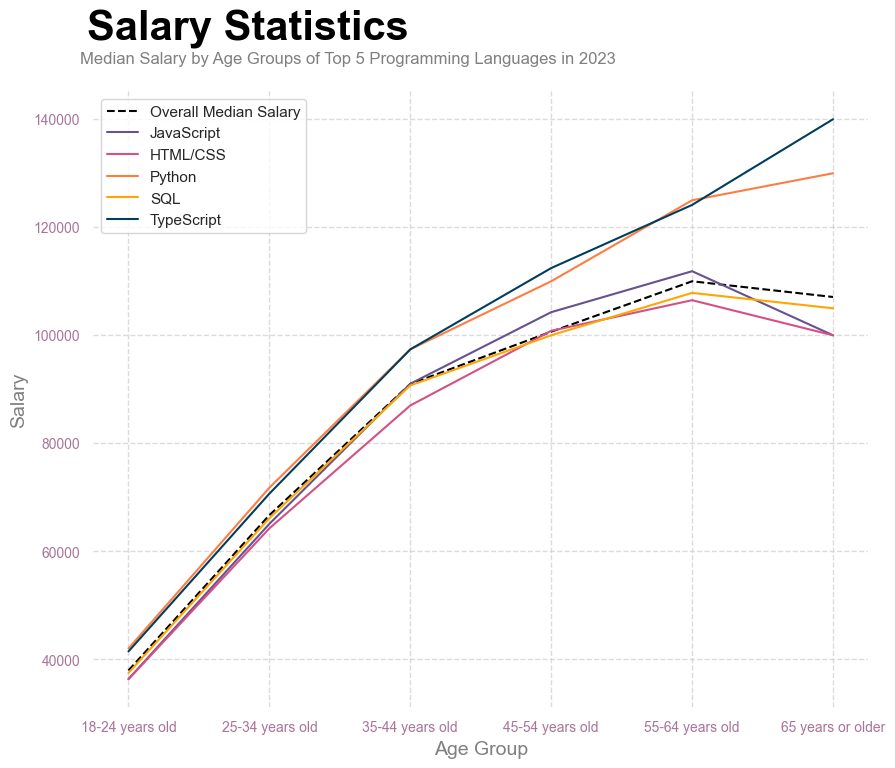

In [85]:
# Custom colors for the plot lines
custom_colors = ["#665191", "#d45087", "#ff7c43", "#ffa600", "#003f5c", "#2f4b7c"]
# Drop any rows with NaN values
all_lang_salary_stats.dropna(inplace=True)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate the median salary by age group for the entire dataset, excluding certain age groups
median_salary_by_age = df.groupby(["Age"])['ConvertedCompYearly'].median().drop(["Prefer not to say", "Under 18 years old"])
# Plot the overall median salary by age group
ax.plot(median_salary_by_age.index, median_salary_by_age, label="Overall Median Salary", color='black', linestyle='dashed')  

# Loop through each language to plot their median salaries
for i, language in enumerate(lang):
    # Get the salary statistics for the current language
    lang_data = all_lang_salary_stats[all_lang_salary_stats['Language'] == language]
    # Select a color for the current language plot line
    color = custom_colors[i % len(custom_colors)] 
    # Plot the median salary by age group for the current language
    ax.plot(lang_data['Age'], lang_data['median'], label=f'{language}', color=color)

# Set the x-axis label
ax.set_xlabel('Age Group', fontsize=14, color='gray')
# Set the y-axis label
ax.set_ylabel('Salary', fontsize=14, color='gray')
# Set the title of the plot
ax.set_title('Salary Statistics', color="black", fontweight='bold', fontsize=30, x=0.2, y=1.07)
# Set the subtitle of the plot
plt.suptitle('Median Salary by Age Groups of Top 5 Programming Languages in 2023', fontsize=12, color='gray', x=0.38, y=0.93)
# Add a legend to the plot
ax.legend()
# Add grid lines to the plot
plt.grid(linestyle='--', alpha=0.7)
# Customize the tick labels
plt.xticks(fontsize=10, color="#a97499")
plt.yticks(fontsize=10, color="#a97499")
# Remove the top, right, bottom, and left spines (borders) of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# Display the plot
plt.show()

Python and TypeScript are associated with higher median salaries, especially in mid to late career stages. The data suggests that professionals working with these languages might expect better financial returns as they gain experience and age. Conversely, those working with HTML/CSS and SQL might experience lower median salaries comparatively, particularly in later career stages. This information could be valuable for individuals considering career longevity and financial growth in relation to their choice of programming language.

### Distribution of all developers based on education level

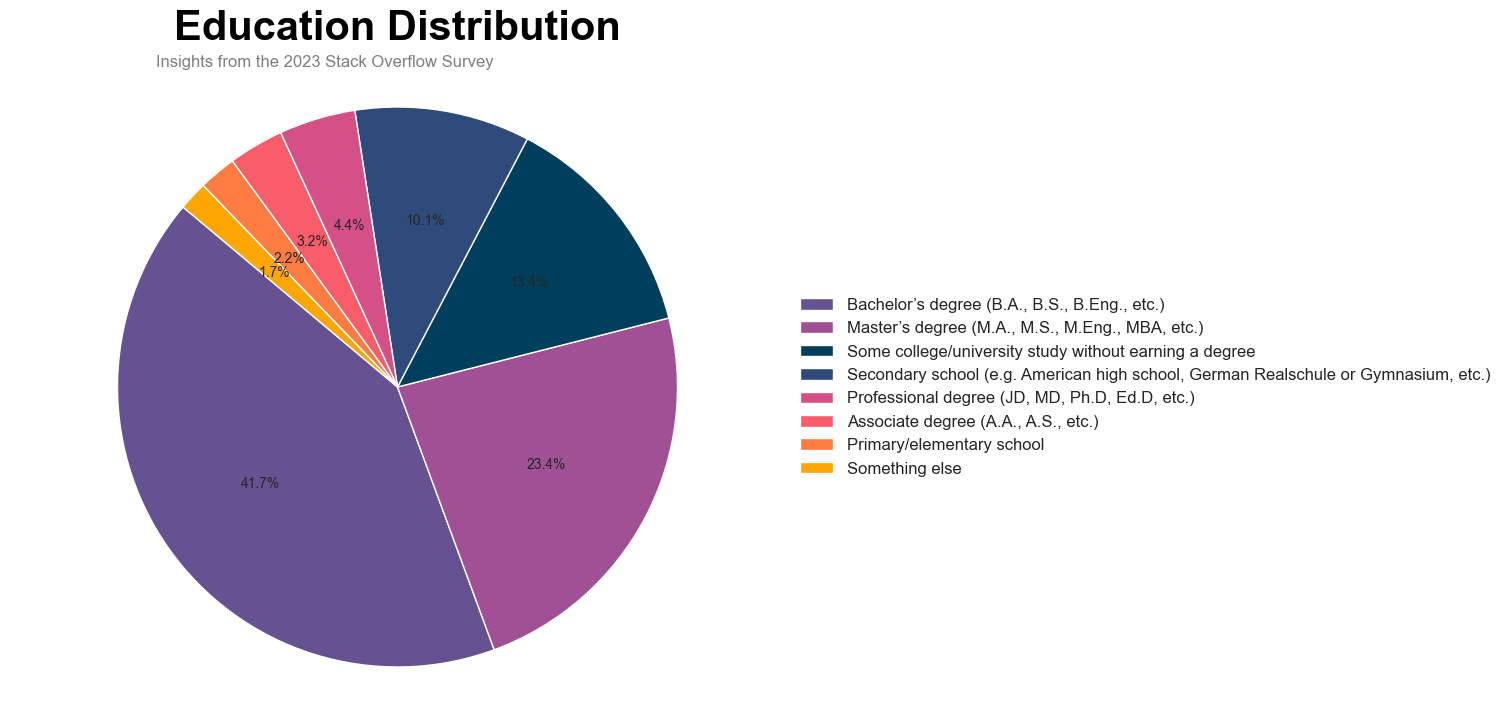

In [86]:
# Calculate the value counts for the 'EdLevel' column in the DataFrame
ed_level_counts = df["EdLevel"].value_counts()

# Define a list of custom colors for the pie chart slices
custom_colors = ["#665191", "#a05195", "#003f5c", "#2f4b7c", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

# Create a new figure with specified dimensions
plt.figure(figsize=(10, 8))

# Create a pie chart
plt.pie(ed_level_counts, autopct='%1.1f%%', colors=custom_colors, startangle=140,
        wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 10})

# Add a legend to the plot
plt.legend(ed_level_counts.index, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, frameon=False)

# Set the title of the pie chart
plt.title('Education Distribution', color='black', fontweight='bold', fontsize=30, y=1.05)

# Set the subtitle of the pie chart
plt.suptitle('Insights from the 2023 Stack Overflow Survey', fontsize=12, color='gray', x=0.44, y=0.91)  # Adjust y-coordinate

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()


The majority of respondents (65.1%) have at least a Bachelor’s or Master’s degree, suggesting that higher education is common among participants in the tech community.
A significant proportion of respondents have some college education (13.4%) or have completed secondary school (10.1%), indicating that formal education beyond high school is prevalent.
The presence of respondents with professional degrees (4.4%) and associate degrees (3.2%) highlights the diversity in educational backgrounds.

### Percentage Distribution of Remote Work by Organization Size

In [87]:
orgsize_remote_counts = df.groupby(["OrgSize"])["RemoteWork"].value_counts()
orgsize_remote_counts

OrgSize                                             RemoteWork                          
1,000 to 4,999 employees                            Hybrid (some remote, some in-person)    3474
                                                    Remote                                  2822
                                                    In-person                                928
10 to 19 employees                                  Remote                                  2128
                                                    Hybrid (some remote, some in-person)    1920
                                                    In-person                               1193
10,000 or more employees                            Hybrid (some remote, some in-person)    4322
                                                    Remote                                  2862
                                                    In-person                                730
100 to 499 employees                  

In [88]:
orgsize_counts = df.groupby(["OrgSize"])["RemoteWork"].count()
orgsize_counts

OrgSize
1,000 to 4,999 employees                               7224
10 to 19 employees                                     5241
10,000 or more employees                               7914
100 to 499 employees                                  12201
2 to 9 employees                                       6414
20 to 99 employees                                    13357
5,000 to 9,999 employees                               2673
500 to 999 employees                                   4464
I don’t know                                           1175
Just me - I am a freelancer, sole proprietor, etc.     4009
Name: RemoteWork, dtype: int64

In [89]:
# Group the DataFrame by 'OrgSize' and count the occurrences of each 'RemoteWork' category within each organization size
orgsize_remote_counts = df.groupby(["OrgSize"])["RemoteWork"].value_counts()
# Count the total number of entries for each organization size
orgsize_counts = df.groupby(["OrgSize"])["RemoteWork"].count()

# Calculate the percentage of each 'RemoteWork' category within each organization size
orgsize_remote_percentage = orgsize_remote_counts.div(orgsize_counts, level="OrgSize") * 100

# Reset the index and rename the columns for better readability
df_formatted = orgsize_remote_percentage.reset_index(name='Percentage')
df_formatted.columns = ['OrgSize', 'RemoteWork', 'Percentage']

# Replace long category names for readability in the plot
df_formatted.replace("Just me - I am a freelancer, sole proprietor, etc.", "Just me", inplace=True)

# Pivot the DataFrame to have 'OrgSize' as the index and 'RemoteWork' categories as columns
if 'Percentage' in df_formatted.columns:
    df_pivot = df_formatted.pivot(index='OrgSize', columns='RemoteWork', values='Percentage')

# Define a custom order for the organization sizes
custom_order = ["Just me", "2 to 9 employees", "10 to 19 employees", "20 to 99 employees", 
                "100 to 499 employees", "500 to 999 employees", "1,000 to 4,999 employees", 
                "5,000 to 9,999 employees", "10,000 or more employees", "I don’t know"]
# Reverse the order to plot from largest to smallest
custom_order.reverse()

# Set the custom order for the index
df_pivot.index = pd.CategoricalIndex(df_pivot.index, categories=custom_order, ordered=True)
# Sort the DataFrame based on the custom order
custom_sorted = df_pivot.sort_index()

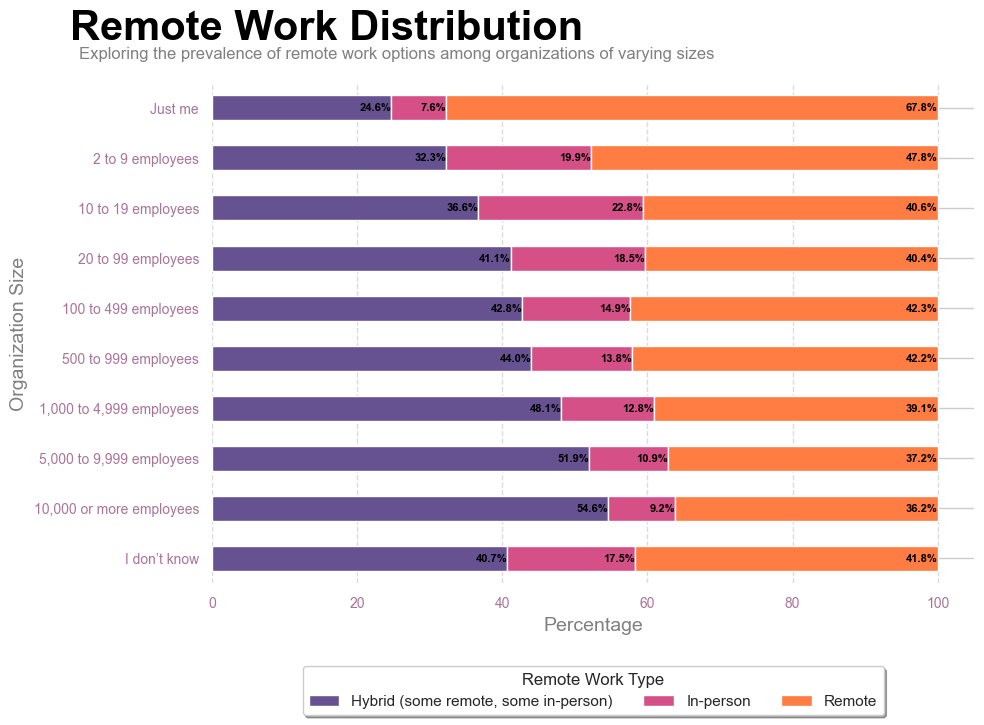

In [90]:
# Define custom colors for the stacked bar chart
custom_colors = ["#665191", "#d45087", "#ff7c43"]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data as a horizontal stacked bar chart
bars = custom_sorted.plot(kind='barh', stacked=True, ax=ax, color=custom_colors)

# Set the x-axis label
ax.set_xlabel('Percentage', fontsize=14, color='gray')
# Set the y-axis label
ax.set_ylabel('Organization Size', fontsize=14, color='gray')
# Set the title of the plot
ax.set_title('Remote Work Distribution', color="black", fontweight='bold', fontsize=30, x=0.15, y=1.07)

# Set the subtitle of the plot
plt.suptitle('Exploring the prevalence of remote work options among organizations of varying sizes', 
             fontsize=12, color='gray', x=0.405, y=0.88)

# Add a legend to the plot
ax.legend(title='Remote Work Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), 
          fancybox=True, shadow=True, ncol=5)

# Add grid lines to the x-axis
plt.grid(linestyle='--', alpha=0.7, axis='x')

# Customize the tick labels
plt.xticks(fontsize=10, color="#a97499")
plt.yticks(fontsize=10, color="#a97499")

# Remove the top, right, bottom, and left spines (borders) of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Add percentage labels to each bar
for bar in ax.patches:
    width = bar.get_width()  # Get the width of the bar (i.e., the percentage)
    label_x_pos = bar.get_x() + width  # Calculate the x position for the label
    label_y_pos = bar.get_y() + bar.get_height() / 2  # Calculate the y position for the label
    if width > 0:  # Only add labels for bars with a positive width
        ax.text(label_x_pos, label_y_pos, f'{width:.1f}%', va='center', ha='right', 
                fontsize=8, color='black', fontweight='bold')

# Adjust the layout to prevent overlap
plt.tight_layout()
# Display the plot
plt.show()

The chart shows the distribution of remote work options across organizations of various sizes. Freelancers predominantly work remotely (67.8%), while small organizations (2 to 19 employees) also favor remote and hybrid setups. Medium-sized organizations (20 to 499 employees) have a balanced distribution of remote and hybrid work, with a slight preference for hybrid setups.

Larger organizations (500 to 9,999 employees and 10,000 or more employees) primarily adopt hybrid work setups, with remote work as a significant alternative. In-person work is the least common across all organization sizes, with a slight increase in smaller organizations. The trend indicates a clear shift towards flexible work arrangements, with hybrid and remote work being dominant across most organization sizes, particularly in larger firms.

### Finding which are the most prefered methods for learning new things

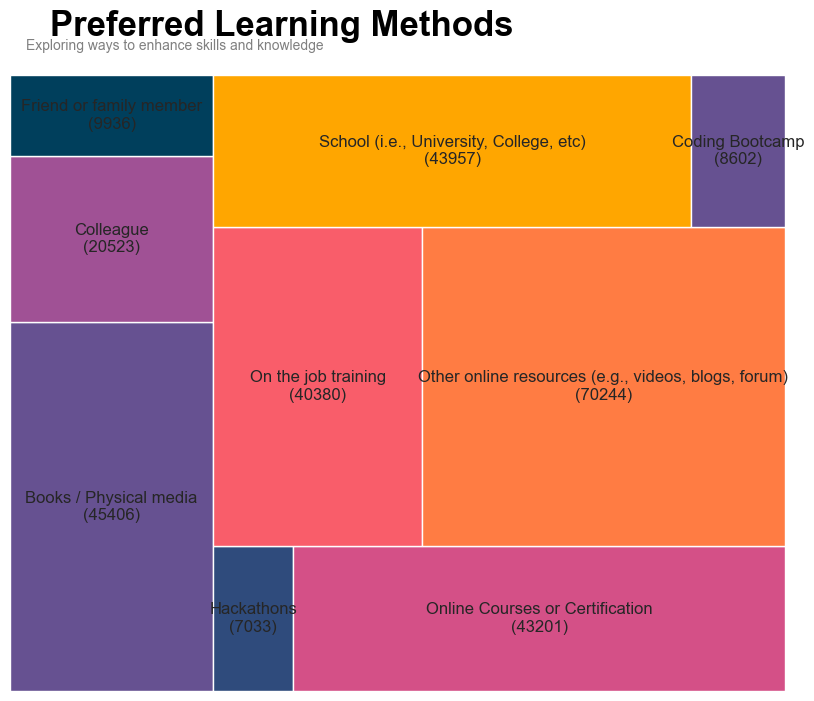

In [91]:
# Drop NaN values from the 'LearnCode' column
learncode_responses = df['LearnCode'].dropna()

# Initialize a Counter to count occurrences of each learning method
learncode_counter = Counter()

# Update the counter with learning methods from each response
for response in learncode_responses:
    learncode_counter.update(response.split(';'))

# Convert the counter to a DataFrame
data_for_treemap = pd.DataFrame(list(learncode_counter.items()), columns=['Learning Method', 'Frequency'])

# Optionally, drop a specific index if required (this example drops index 9)
data_for_treemap.drop(index=9, inplace=True)

# Replace a long category name with a shorter one for better readability
data_for_treemap.replace("Hackathons (virtual or in-person)", "Hackathons", inplace=True)

# Define custom colors for the treemap
custom_color = ["#665191", "#a05195", "#003f5c", "#2f4b7c", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

# Create labels for the treemap with the format 'Method (Frequency)'
labels = [f'{method}\n({freq})' for method, freq in zip(data_for_treemap['Learning Method'], data_for_treemap['Frequency'])]

# Create a figure for the plot with specified dimensions
plt.figure(figsize=(10, 8))

# Use a colormap to generate colors based on the number of unique learning methods
colors = plt.cm.viridis(np.linspace(0, 1, len(data_for_treemap['Frequency'])))

# Plot the treemap using the squarify library
squarify.plot(sizes=data_for_treemap['Frequency'], label=labels, color=custom_color)

# Remove the axes for a cleaner look
plt.axis('off')

# Set the title of the plot
plt.title('Preferred Learning Methods', color="black", fontweight='bold', fontsize=25, x=0.35, y=1.05)

# Set the subtitle of the plot
plt.suptitle("Exploring ways to enhance skills and knowledge", color='gray', fontsize=10, x=0.29, y=0.925)

# Display the plot
plt.show()

Online Resources Dominance: The most substantial portion of respondents prefers other online resources, highlighting the importance of easily accessible and varied learning materials.

Traditional and Formal Education: Books/physical media and formal education are still highly regarded, indicating a balance between new and traditional learning methods.

Practical Learning: On-the-job training and learning from colleagues show the value of practical, hands-on learning in real-world settings.

Structured Online Learning: The popularity of online courses or certifications signifies a shift towards structured, yet flexible, online learning platforms.

Experiential and Intensive Learning: Hackathons and coding bootcamps, though smaller in respondent count, are critical for intensive and experiential learning.

In [92]:
learncodeonline_responses = df['LearnCodeOnline']
learncodeonline_responses.dropna(inplace=True)
learncodeonline_counter = Counter()

for response in learncodeonline_responses:
    learncodeonline_counter.update(response.split(';'))

online_learning_method = []
online_frequency= []

for item in learncodeonline_counter.most_common(7):
    online_learning_method.append(item[0])
    online_frequency.append(item[1])
learncodeonline_counter

Counter({'Formal documentation provided by the owner of the tech': 63329,
         'Stack Overflow': 57861,
         'Blogs with tips and tricks': 53745,
         'How-to videos': 42149,
         'Written Tutorials': 42012,
         'Video-based Online Courses': 34629,
         'Books': 30432,
         'Click to write Choice 20': 29780,
         'Written-based Online Courses': 25309,
         'Recorded coding sessions': 19690,
         'Interactive tutorial': 18242,
         'Online challenges (e.g., daily or weekly coding challenges)': 15544,
         'Certification videos': 9326,
         'Auditory material (e.g., podcasts)': 5571,
         'Programming Games': 4131,
         'Other (Please specify):': 2280})

### Comparison of median salary in 2022 and 2023

In [93]:
# Drop rows with missing 'LanguageHaveWorkedWith' data
lang_responses = df['LanguageHaveWorkedWith'].dropna()

# Initialize a counter to tally the programming languages
language_counter = Counter()
for response in lang_responses:
    # Update the counter with the languages used by respondents, split by ';'
    language_counter.update(response.split(';'))

lang_salary_data = []
for language in language_counter:
    # Create a regex pattern to match the exact language
    regex_pattern = r'(?<!\w)' + re.escape(language) + r'(?!\w)'
    # Filter the dataframe for respondents who have worked with the language
    filt_lang = df["LanguageHaveWorkedWith"].str.contains(regex_pattern, na=False, regex=True)
    # Calculate the median salary for the filtered respondents
    median_salary = df.loc[filt_lang, "ConvertedCompYearly"].median()
    # Append the language and its median salary to the list
    lang_salary_data.append((language, median_salary))

# Create a DataFrame for 2023 language salary data
lang_salary_df2023 = pd.DataFrame(lang_salary_data, columns=['Language', 'MedianSalary2023'])


In [94]:
#Load and Process 2022 Data
df2 = pd.read_csv("survey_results_public_2022.csv")
lang_responses_2022 = df2['LanguageHaveWorkedWith'].dropna()
language_counter_2022 = Counter()
for response_2022 in lang_responses_2022:
    language_counter_2022.update(response_2022.split(';'))

lang_salary_data_2022 = []
for language_2022 in language_counter_2022:
    regex_pattern_2022 = r'(?<!\w)' + re.escape(language_2022) + r'(?!\w)'
    filt_lang_2022 = df2["LanguageHaveWorkedWith"].str.contains(regex_pattern_2022, na=False, regex=True)      
    median_salary_2022 = df2.loc[filt_lang_2022, "ConvertedCompYearly"].median()
    lang_salary_data_2022.append((language_2022, median_salary_2022))

lang_salary_df_2022 = pd.DataFrame(lang_salary_data_2022, columns=['Language', 'MedianSalary2022'])

In [95]:
# Merge the two DataFrames on the 'Language' column
salary_2023_2022 = pd.merge(lang_salary_df2023, lang_salary_df_2022, on='Language', how='inner')
salary_2023_2022

,Language,MedianSalary2023,MedianSalary2022
0,HTML/CSS,70148.0,63984.0
1,JavaScript,74034.0,65580.0
2,Python,78331.0,71105.0
3,Go,92760.5,89204.0
4,PHP,58899.0,50496.0
5,Ruby,98522.0,93000.0
6,SQL,74963.0,69108.0
7,TypeScript,77104.0,70276.0
8,Clojure,96381.0,106644.0
9,Elixir,96381.0,92959.0


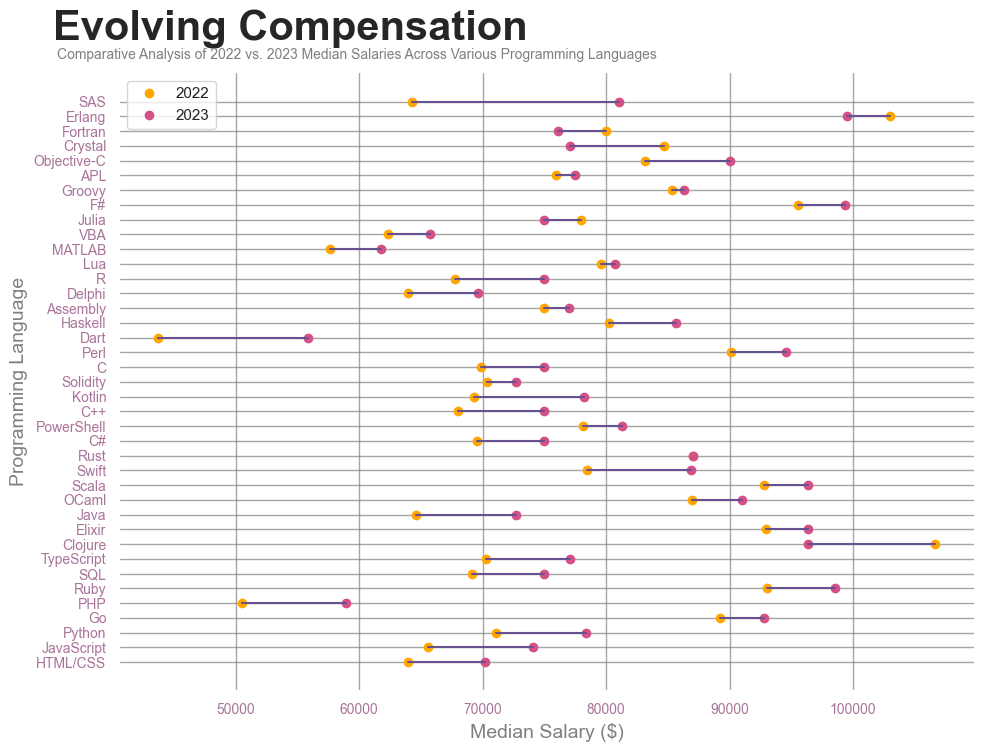

In [96]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points for each year
for i, row in salary_2023_2022.iterrows():
    ax.plot([row['MedianSalary2022']], [row['Language']], 'o', color='#ffa600', label='2022' if i == 0 else "")
    ax.plot([row['MedianSalary2023']], [row['Language']], 'o', color='#d45087', label='2023' if i == 0 else "")
    # Draw a line connecting the median salaries for 2022 and 2023 for each language
    ax.plot([row['MedianSalary2022'], row['MedianSalary2023']], [row['Language'], row['Language']], '-', color='#665191')

# Set the title and subtitles
ax.set_title('Evolving Compensation', fontweight='bold', fontsize=30, x=0.2, y=1.04)
plt.suptitle('Comparative Analysis of 2022 vs. 2023 Median Salaries Across Various Programming Languages', fontsize=10, color='gray', x=0.365, y=0.89)

# Set the axis labels
ax.set_xlabel('Median Salary ($)', fontsize=14, color="gray")
ax.set_ylabel('Programming Language', fontsize=14, color="gray")

# Customize the tick marks
plt.xticks(fontsize=10, color="#a97499")
plt.yticks(fontsize=10, color="#a97499")

# Add a legend
ax.legend()

# Add grid lines
plt.grid(linestyle='-', alpha=0.7, color="gray")

# Remove unnecessary plot spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The visualization presents a comparative analysis of median salaries for various programming languages between the years 2022 and 2023. The x-axis shows the median salary in dollars, while the y-axis lists the programming languages. Each language's median salary for both years is represented by distinct colored dots (orange for 2022 and pink for 2023), with connecting lines illustrating salary changes over the period. Key observations include noticeable salary increases for languages such as PHP, Dart, and SAS, indicating growing demand and value for these skills. Conversely, languages like Clojure, Fortran, and Crystal exhibit a decline or minimal change in median salary, suggesting potential shifts in market demand. Languages such as Ruby, Perl, and Erlang continue to command high median salaries, reflecting their specialized use, while languages like HTML/CSS and PHP remain on the lower end of the salary spectrum, possibly due to their widespread use and higher supply of developers. Some languages, including Python, JavaScript, and C#, show consistent salary increases, indicating stable market value. This visualization is valuable for developers, educators, and industry analysts as it highlights trends in programming language compensation, providing insights for career choices, educational focus, and market analysis.

### Analyzing which type of developer earns what and how much expierence they have


In [97]:
# Drop any NaN values in the 'DevType' column and store the responses
devtype_responses = df['DevType'].dropna()

# Initialize a Counter to count occurrences of each developer type
devtype_counter = Counter()

# Iterate over each response in devtype_responses
for response in devtype_responses:
    # Split each response by ';' and update the counter with the resulting list
    devtype_counter.update(response.split(';'))

# Initialize an empty list to store developer type salary data
devtype_salary_data = []

# Iterate over each developer type in the counter
for devtype in devtype_counter:
    # Skip the "Other (please specify):" category
    if devtype.strip() == "Other (please specify):":
        continue
    
    # Create a regex pattern to match the exact developer type
    regex_pattern = r'(?<!\w)' + re.escape(devtype) + r'(?!\w)'
    
    # Filter the DataFrame for rows where 'DevType' contains the current developer type
    filt_devtype = df["DevType"].str.contains(regex_pattern, na=False, regex=True)
    
    # Calculate the median salary for the current developer type
    median_salary = df.loc[filt_devtype, "ConvertedCompYearly"].median()
    
    # Calculate the mean work experience for the current developer type
    mean_workexp = df.loc[filt_devtype, "WorkExp"].mean()  # try median once
    
    # Count the number of non-null salary entries for the current developer type
    num_contributors = df.loc[filt_devtype, "ConvertedCompYearly"].notnull().sum()
    
    # Append the developer type, median salary, mean work experience, and number of contributors to the list
    devtype_salary_data.append((devtype, median_salary, mean_workexp, num_contributors))

# Create a DataFrame from the developer type salary data
devtype_salary_df = pd.DataFrame(devtype_salary_data, columns=['DevType', 'MedianSalary2023', 'MeanWorkExperience', 'Contributors'])

# Sort the DataFrame by median salary in descending order
devtype_salary_df = devtype_salary_df.sort_values(by='MedianSalary2023', ascending=False)

# Display the DataFrame
devtype_salary_df

,DevType,MedianSalary2023,MeanWorkExperience,Contributors
0,"Senior Executive (C-Suite, VP, etc.)",124753.5,18.481434,776
23,Engineering manager,124138.0,15.699022,1311
31,Marketing or sales professional,116000.0,12.862745,40
27,"Engineer, site reliability",115657.0,12.106227,319
24,Developer Experience,107090.0,12.843434,219
22,Cloud infrastructure engineer,105000.0,12.507886,766
28,Blockchain,103743.0,9.143713,185
29,Developer Advocate,100312.5,16.949153,116
10,Security professional,99311.0,12.860262,237
30,Scientist,92321.0,13.251613,196


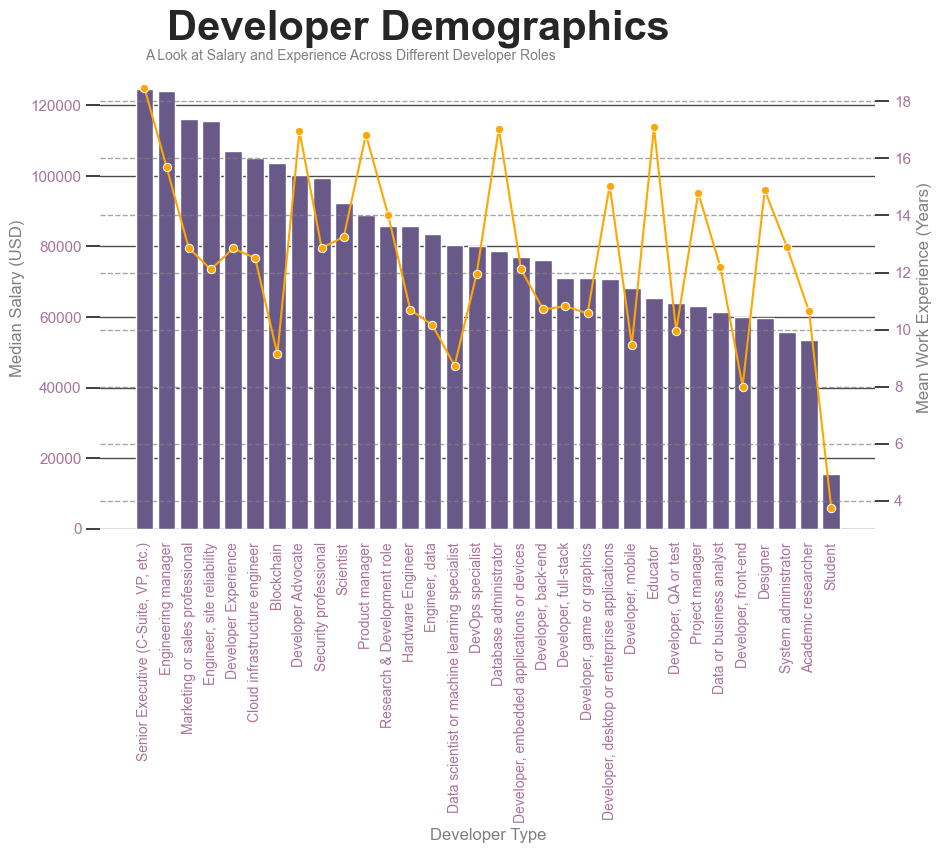

In [98]:
# Create a figure and axis for the bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a bar plot for the median salary data
sns.barplot(data=devtype_salary_df, x='DevType', y='MedianSalary2023', ax=ax1, color='#665191')

# Set the x and y axis labels
ax1.set_xlabel('Developer Type', color="gray", fontsize=12)
ax1.set_ylabel('Median Salary (USD)', color='gray', fontsize=12)

# Customize the y-axis tick parameters
ax1.tick_params(axis='y', labelcolor='#a97499', size=10)

# Rotate the x-axis labels and set their color and font size
plt.xticks(rotation=90, color='#a97499', fontsize=10)

# Remove the top, bottom, left, and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a grid to the y-axis
plt.grid(axis='y', linestyle='-', alpha=0.7, color="black")

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Create a line plot for the mean work experience data
sns.lineplot(data=devtype_salary_df, x='DevType', y='MeanWorkExperience', ax=ax2, marker='o', sort=False, color='#ffa600')

# Set the y-axis label for the secondary y-axis
ax2.set_ylabel('Mean Work Experience (Years)', color='gray', fontsize=12)

# Customize the y-axis tick parameters for the secondary y-axis
ax2.tick_params(axis='y', labelcolor='#a97499', size=10)

# Remove the top, bottom, left, and right spines of the secondary y-axis plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a dashed grid to the secondary y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

# Set the title of the plot
plt.title('Developer Demographics', fontweight='bold', fontsize=30, x=0.41, y=1.04)

# Set the subtitle of the plot
plt.suptitle("A Look at Salary and Experience Across Different Developer Roles", fontsize=10, color='gray', x=0.375, y=0.91)

# Display the plot
plt.show()

The analysis of developer demographics reveals significant insights into median salaries and mean work experience across various roles. Senior Executives and Engineering Managers earn the highest median salaries, approximately $124,753 and $124,138, respectively, while roles like Marketing or Sales Professionals and Site Reliability Engineers also command high salaries. Developer Advocates and Product Managers have substantial work experience (around 17 years) but are followed closely by Blockchain Developers and Cloud Infrastructure Engineers who earn high salaries with relatively less experience. Common roles such as Full-Stack and Back-End Developers show moderate median salaries with substantial numbers of contributors. The visualization clearly depicts the median salary distribution and overlays mean work experience, highlighting the variation in experience required for different roles and the high earning potential of managerial and specialized positions.

### Analysis of Coding Years, Professional Coding Years, and Work Experience


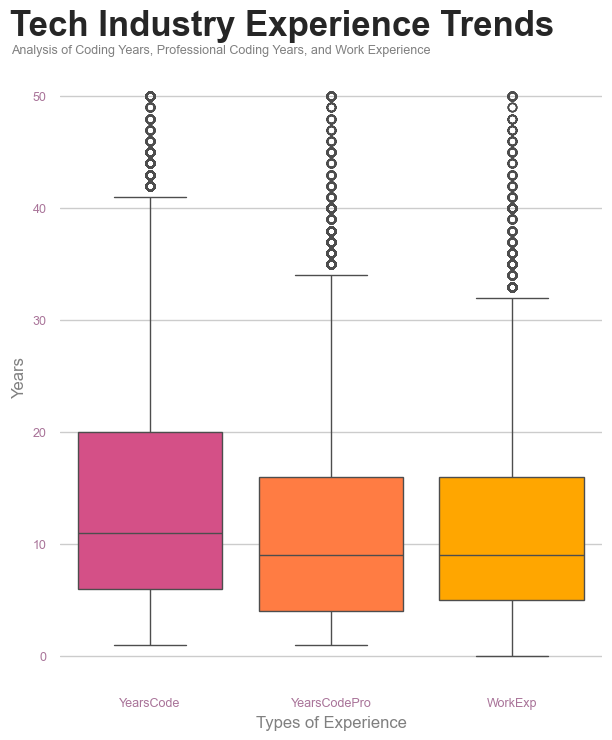

In [99]:
# Convert 'YearsCode', 'YearsCodePro', and 'WorkExp' columns to numeric type
df['YearsCode'] = pd.to_numeric(df['YearsCode'])
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'])
df['WorkExp'] = pd.to_numeric(df['WorkExp'])

# Set the seaborn style to 'whitegrid' for the plot
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(7, 8))

# Create a boxplot for 'YearsCode', 'YearsCodePro', and 'WorkExp' columns
sns.boxplot(data=df[["YearsCode", "YearsCodePro", "WorkExp"]], palette=["#d45087", "#ff7c43", "#ffa600"], saturation=1)

# Set the main title of the plot
plt.title('Tech Industry Experience Trends', fontweight='bold', fontsize=25, x=0.41, y=1.04)

# Set the subtitle of the plot
plt.suptitle('Analysis of Coding Years, Professional Coding Years, and Work Experience', fontsize=9, color='gray', x=0.355, y=0.91)

# Set the y-axis label
plt.ylabel('Years', color='gray', fontsize=12)

# Set the x-axis label
plt.xlabel('Types of Experience', color='gray', fontsize=12)

# Customize the x-axis tick labels
plt.xticks(fontsize=9, color="#a97499")

# Customize the y-axis tick labels
plt.yticks(fontsize=9, color="#a97499")

# Remove the top, bottom, left, and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()


1. **YearsCode**:
    - The median total coding experience is around 10 years.
    - The interquartile range (IQR), representing the middle 50% of the data, spans from approximately 5 to 15 years.
    - There are a significant number of outliers, with some respondents reporting up to 50 years of coding experience.

2. **YearsCodePro**:
    - The median professional coding experience is about 8 years, which is lower than the median total coding experience.
    - The IQR for professional experience is narrower, ranging from around 3 to 15 years.
    - Outliers extend up to around 40 years, indicating some respondents have extensive professional coding careers.

3. **WorkExp**:
    - The median total work experience is around 10 years, similar to the median total coding experience.
    - The IQR for work experience is slightly wider than professional coding experience, indicating more variability in the total work experience.
    - Outliers reach up to 40 years, suggesting some individuals have long careers spanning multiple roles, not necessarily limited to coding.

4. **Comparative Insights**:
    - Total coding experience (`YearsCode`) generally exceeds professional coding experience (`YearsCodePro`), reflecting that many individuals begin coding before starting their professional careers.
    - The median total work experience aligns closely with the median total coding experience, indicating that many respondents' work experience is heavily focused on coding-related roles.
    - The presence of outliers in all three categories suggests a diverse range of experience levels within the tech industry, from beginners to highly seasoned professionals.

This visualization effectively highlights the differences and similarities in coding and work experience among tech industry professionals, showing the range of expertise and career stages within the field.